## Guide - pyLEnM package 
# Case 1 - Basics
Welcome to the demonstration notebook where we'll go over all of the Basic functions in the **pyLEnM** package!<br>
Let’s get started!


## Installing, Importing, and Understanding the package

Make sure to install pyLEnM from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [1]:
# pip install pylenm

In [1]:
# Import our packages
import pylenm
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm.__version__`

In [2]:
pylenm.__version__

'0.1.13.12'

The pyLEnM package has two modules as follows: 
   <br>1. **functions:** where all of the package functionality is imported.
   <br>2. **usage:** where all of the fucntion descriptions are imported.

Let's import each of these individually from the package:

In [3]:
from pylenm import functions, usage

Let's start with the **usage** module.
The module has 2 useful functions to help you understand how to use the pyLEnM functions:<br>
   1. **get_FunctionList():** lists the functions available in the package.<br>
   2. **get_FunctionDescription():** provides a detailed description of a function(s) including the parameters.

Let's see what pyLEnM has to offer:

In [4]:
usage.get_FunctionList()

pyLEnM functions:
    1) simplify_data
    2) get_MCL
    3) get_unit
    4) filter_wells
    5) remove_outliers
    6) get_analyte_details
    7) get_data_summary
    8) query_data
    9) plot_data
    10) plot_all_data
    11) plot_correlation_heatmap
    12) plot_all_correlation_heatmap
    13) interpolate_wells_by_analyte
    14) interpolate_well_data
    15) plot_corr_by_well
    16) plot_all_corr_by_well
    17) plot_corr_by_date_range
    18) plot_corr_by_year
    19) plot_MCL
    20) plot_PCA_by_date
    21) plot_PCA_by_year
    22) plot_PCA_by_well
    23) plot_coordinates_to_map
    24) getCommonDates
    25) getCleanData
    26) getJointData
    27) get_Best_GP
    28) fit_gp
    29) interpolate_topo
    30) get_Best_Wells




You can run **get_FunctionDescription()** on its own to get ALL function descriptions: ...

In [5]:
usage.get_FunctionDescription()

--------------------------------------------------------------------------------------
1) simplify_data
------------------------------------------

simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the d

... or simply specify the name (as a string) of the function you would like a description for:

In [6]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

If at any point you forget what or how to use any of the pyLEnM fucntions, refer back to the usage module! 

## Using pyLEnM

Now let's get our hands dirty and start exploring the **functions** module.

First, import our two datasets here. It's located in the same directory in a folder called `data`.<br><br>
PyLEnM takes in two datasets: <br>
1. **Concentration Data:** Dataset containing the concetration values<br>
2. **Construction Data:** Dataset containing the construction information of locations such as the Longitude and Latitude values.

In [7]:
url_1 = 'https://raw.githubusercontent.com/AurelienMeray/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
url_2 = 'https://github.com/AurelienMeray/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
concentration_data = pd.read_csv(url_1)
construction_data = pd.read_excel(url_2)

Now that we have our data imported let's save the data into our functions class.

We do this by initializing **functions** with our data. We'll call the instance pylenm

In [8]:
# Create instance
pylenm = functions(concentration_data) # Save concentration data
pylenm.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



If the data passed doesn't meet the package requiremnts, you'll be presented with the following message.

To demonstrate the requirments we'll pass an arbitrary list instead of a dataframe.

In [9]:
functions([1,2,3,4,5])

ERROR: Make sure the data is a pandas DataFrame.

PYLENM DATA REQUIREMENTS:
The imported data needs to meet ALL of the following conditions to have a successful import:
   1) Data should be a pandas dataframe.
   2) Data must have these column names: 
      ['COLLECTION_DATE','STATION_ID','ANALYTE_NAME','RESULT','RESULT_UNITS']


We can view the concentration data we imported by running the `getData()` function.

In [10]:
pylenm.getData().head()

ID FACILITY  FFA_INDEX_NO SRS_AREA  \
0  767202      SRS            19      GSA   
1  767203      SRS            19      GSA   
2  767204      SRS            19      GSA   
3  767205      SRS            19      GSA   
4  767206      SRS            19      GSA   

                                       OPERABLE_UNIT STATION_ID  \
0  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FOB 15D   
1  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB133D   
2  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB134D   
3  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB136D   
4  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB122D   

      STATION_TYPE  SEIR_ID                      WELL_USE  REVISION_ID  \
0  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
1  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
2  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
3  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
4  MONITORING WELL      NaN          F_PLUME;H_AUX;MW_AUX          NaN   

  SAMPLE_EVENT  LOG_BOOK_NO SAMPLE_NAME COLLECTION_DATE  QUARTER SAMPLE_USE  \
0   1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q        NaN   
1   1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q        NaN   
2   1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q        NaN   
3   1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q        NaN   
4   1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q        NaN   

     ANALYTE_NAME ANALYTICAL_METHOD    CAS_NO FILTERED_UNFILTERED  MDL  PQL  \
0  DEPTH_TO_WATER               NaN  H20DEPTH                 NaN  NaN  NaN   
1  DEPTH_TO_WATER               NaN  H20DEPTH                 NaN  NaN  NaN   
2  DEPTH_TO_WATER               NaN  H20DEPTH                 NaN  NaN  NaN   
3  DEPTH_TO_WATER               NaN  H20DEPTH                 NaN  NaN  NaN   
4  DEPTH_TO_WATER               NaN  H20DEPTH                 NaN  NaN  NaN   

  EPA_STORET___EMS_QUALIFIERS EPA_FUNCT_GUIDE_CODE LAB_QUALIFICATION  \
0                         NaN                  NaN               NaN   
1                         NaN                  NaN               NaN   
2                         NaN                  NaN               NaN   
3                         NaN                  NaN               NaN   
4                         NaN                  NaN               NaN   

  DATA_QUALIFERS  RESULT RESULT_UNITS  COUNTING_UNCERTAINTY MATRIX_CODE  \
0            NaN   20.80           ft                   NaN         NaN   
1            NaN   16.25           ft                   NaN         NaN   
2            NaN   18.40           ft                   NaN         NaN   
3            NaN   15.24           ft                   NaN         NaN   
4            NaN   15.40           ft                   NaN         NaN   

  VALIDATION_STATUS FIELD_QC_CODE LAB_QC_CODE LAB_CODE ANALYTE_TYPE  \
0                UE           NaN         NaN      NaN          NaN   
1                UE           NaN         NaN      NaN          NaN   
2                UE           NaN         NaN      NaN          NaN   
3                UE           NaN         NaN      NaN          NaN   
4                UE           NaN         NaN      NaN          NaN   

   DILUTION_FACTOR SAMPLER_COMMENTS  
0              NaN      PROG_NAME=W  
1              NaN      PROG_NAME=W  
2              NaN      PROG_NAME=W  
3              NaN      PROG_NAME=W  
4              NaN      PROG_NAME=W

The same can be done for the construction data by running the `get_Construction_Data()` function.

In [11]:
pylenm.get_Construction_Data().head()

FACILITY_ID SITE_GROUP  \
STATION_ID                          
FAI001A            SRS        GSA   
FAI001B            SRS        GSA   
FAI001C            SRS        GSA   
FAI001D            SRS        GSA   
FAI002A            SRS        GSA   

                                                    SITE_NAME  \
STATION_ID                                                      
FAI001A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001B     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001C     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001D     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI002A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

               STATION_TYPE               WELL USE    AQUIFER  \
STATION_ID                                                      
FAI001A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001B     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001C     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001D     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI002A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   

                        WELL_USE   LATITUDE  LONGITUDE     EASTING  \
STATION_ID                                                           
FAI001A     ACTIVE ECO-SENSITIVE  33.273872 -81.622904  441989.564   
FAI001B     ACTIVE ECO-SENSITIVE  33.273873 -81.622891  441990.781   
FAI001C     ACTIVE ECO-SENSITIVE  33.273874 -81.622895  441990.432   
FAI001D     ACTIVE ECO-SENSITIVE  33.273874 -81.622901  441989.928   
FAI002A     ACTIVE ECO-SENSITIVE  33.263961 -81.685462  436156.287   

               NORTHING  SZ_TOP(FT MSL)  SZ_BOT(FT MSL)  GROUND_ELEVATION  \
STATION_ID                                                                  
FAI001A     3681629.999          232.30          231.30             250.1   
FAI001B     3681630.192          241.60          240.60             250.2   
FAI001C     3681630.247          243.68          242.68             250.2   
FAI001D     3681630.223          247.75          246.75             250.1   
FAI002A     3680567.719          166.88          165.88             185.1   

           REFERENCE_ELEVATION_CODE  REFERENCE_ELEVATION  TOTAL_DEPTH  \
STATION_ID                                                              
FAI001A                           C               252.63        19.10   
FAI001B                           C               252.73         9.90   
FAI001C                           C               252.74         7.82   
FAI001D                           C               252.56         3.65   
FAI002A                           C               187.58         3.65   

            CONSTR_OBJ_DIAMETER CONSTR_OBJ_MATERIAL PUMP_TYPE COMPLETION_DATE  \
STATION_ID                                                                      
FAI001A                     2.0                 PVC      NONE      2016-03-22   
FAI001B                     2.0                 PVC      NONE      2016-03-22   
FAI001C                     2.0                 PVC      NONE      2016-03-22   
FAI001D                     2.0                 PVC      NONE      2016-03-22   
FAI002A                     2.0                 PVC      NONE      2016-03-29   

           DATE_SEALED  
STATION_ID              
FAI001A            NaT  
FAI001B            NaT  
FAI001C            NaT  
FAI001D            NaT  
FAI002A            NaT

At any point we can also reset the current working dataset by running `setData()` for the concentration data and `setConstructionData()` for the construction data.

In [12]:
pylenm.setData(concentration_data)
pylenm.setConstructionData(construction_data)

Successfully imported the data!

Successfully imported the construction data!



Let's make use of the **simplify_data** function to get rid of columns we don't need for analysis.

Just as a reminder, we'll call `usage.get_FunctionDescription('simplify_data')` to get details on how to use it.

In [13]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

We'll set the `inplace` parameter to `True` to make it the default working dataset. 

In [14]:
pylenm.simplify_data(inplace=True)

COLLECTION_DATE STATION_ID          ANALYTE_NAME  RESULT RESULT_UNITS
0          1990-01-01     FSB 77                    PH    3.30           pH
1          1990-01-01    FSB105C        DEPTH_TO_WATER   80.49           ft
2          1990-01-01    FSB107D  SPECIFIC CONDUCTANCE  289.00        uS/cm
3          1990-01-01    FSB101A        DEPTH_TO_WATER  134.49           ft
4          1990-01-01    FSB101A  SPECIFIC CONDUCTANCE  161.00        uS/cm
...               ...        ...                   ...     ...          ...
86206      2015-09-24    FBI 15D        DEPTH_TO_WATER   15.40           ft
86207      2015-09-24    FSB127D        DEPTH_TO_WATER   18.20           ft
86208      2015-09-24    FSB113C        DEPTH_TO_WATER   23.20           ft
86209      2015-09-24    FOB 13D        DEPTH_TO_WATER   21.50           ft
86210      2015-09-24     FSB 79        DEPTH_TO_WATER   19.76           ft

[86211 rows x 5 columns]

## Basic Functions

Let's generate some useful reports about the data by calling `get_analyte_details` and `get_data_summary`

In [15]:
pylenm.get_analyte_details(analyte_name='DEPTH_TO_WATER')

Start Date    End Date  Date Range (days)  Unique samples
Well Name                                                           
FSB 94D    1990-01-01  1990-10-08                280               4
FSB 95D    1990-01-01  1990-10-08                280               4
FSB 77     1990-01-01  2006-10-16               6132             122
FSB111C    1990-01-01  2006-10-17               6133             115
FSB105C    1990-01-01  2006-10-19               6135             127
...               ...         ...                ...             ...
FSB146D    2015-04-29  2015-09-09                133               9
FSB145D    2015-04-30  2015-09-09                132               9
FSB143D    2015-05-04  2015-09-09                128               9
FSB144D    2015-05-04  2015-09-09                128               9
FSB142D    2015-05-05  2015-09-09                127               9

[155 rows x 4 columns]

Most functions have a filtering feature which uses the `filter_by_column` fucntion to reduced the search space.<br>
We'll run `get_analyte_details` again but this time we'll view the results for the 'Lower Aquifer' wells only.

In [16]:
pylenm.get_analyte_details('TRITIUM', filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

Start Date    End Date  Date Range (days)  Unique samples
Well Name                                                           
FSB 93C    1990-01-01  2015-07-28               9339             103
FSB107C    1990-01-01  2015-08-04               9346             103
FSB 94C    1990-01-02  2015-07-28               9338             109
FSB 97C    1990-01-03  2015-07-29               9338             103
FSB 98C    1990-01-03  2015-07-29               9338             102
FSB 87C    1990-01-06  2015-07-27               9333             103
FSB102C    1990-01-06  2015-07-28               9334             102
FSB 90C    1990-01-07  2015-07-28               9333             103
FSB 78C    1990-01-07  2015-08-03               9339             109
FSB 91C    1990-01-07  2015-08-03               9339              98
FSB 76C    1990-01-09  2015-07-27               9330             114
FSB 99C    1990-01-09  2015-07-29               9332             103
FSB104C    1990-01-09  2015-07-30               9333             103
FSB 79C    1990-01-09  2015-08-03               9337             102
FSB 88C    1990-01-16  2015-07-28               9324             103
FSB 89C    1990-01-16  2015-07-28               9324             103
FSB114C    1991-02-05  2015-07-27               8938              99
FSB122C    1991-02-06  2015-07-30               8940              97
FSB120C    1991-02-06  2015-08-04               8945              99
FSB112C    1991-02-06  2015-08-10               8951              97
FSB121C    1991-02-07  2015-02-04               8763              73
FSB123C    1991-02-10  2015-01-21               8746              73
FSB116C    1991-02-10  2015-01-22               8747              60
FSB115C    1991-02-11  2015-01-21               8745              60
FSB113C    1991-02-11  2015-07-27               8932              78
FSB 95CR   1991-02-24  2015-07-29               8921             105
FSB 92C    1993-11-07  2015-08-10               7946              87
FOB  2C    2004-05-05  2004-05-05                  0               1
FOB 14C    2004-05-05  2004-05-05                  0               1

`get_data_summary` is another useful summarization function.

In [17]:
pylenm.get_data_summary(analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE',
                                  'PH','URANIUM-238', 'DEPTH_TO_WATER'], sort_by='wells')

Start Date   End Date Date Range (days)  # unique wells  \
Analyte Name                                                                   
TRITIUM              1990-01-01 2015-09-23         9396 days             160   
PH                   1990-01-01 2015-09-23         9396 days             158   
SPECIFIC CONDUCTANCE 1990-01-01 2015-09-23         9396 days             156   
DEPTH_TO_WATER       1990-01-01 2015-09-24         9397 days             155   
IODINE-129           1990-01-06 2015-09-23         9391 days             150   
URANIUM-238          1990-01-06 2015-09-23         9391 days             144   

                      # samples    Unit         mean          std      min  \
Analyte Name                                                                 
TRITIUM                   13476  pCi/mL  1248.316406  3261.565925   -0.628   
PH                        18517      pH     5.354886     1.529332    0.000   
SPECIFIC CONDUCTANCE      18276   uS/cm   425.754861   555.068915    0.000   
DEPTH_TO_WATER            20091      ft    46.814224    38.137888    0.500   
IODINE-129                 5405   pCi/L    41.624339    92.511351 -356.900   
URANIUM-238                5319   pCi/L    66.398114   169.240747   -2.650   

                         25%     50%     75%      max  
Analyte Name                                           
TRITIUM               25.300  193.00  934.00  44800.0  
PH                     4.100    5.20    6.40     12.7  
SPECIFIC CONDUCTANCE  87.000  213.00  544.00  10700.0  
DEPTH_TO_WATER        16.450   32.17   72.90    177.2  
IODINE-129             0.996    9.37   45.10   1620.0  
URANIUM-238            0.062    0.64   43.75   1810.0

Here is the same function but with the same filtering we applied above ('Lower Aquifer' wells).

In [18]:
pylenm.get_data_summary(analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE',
                                  'PH','URANIUM-238', 'DEPTH_TO_WATER'],
                                  filter=True, col='AQUIFER', equals=['LAZ_UTRAU'], sort_by='wells')

Start Date   End Date Date Range (days)  # unique wells  \
Analyte Name                                                                   
TRITIUM              1990-01-01 2015-08-10         9352 days              29   
SPECIFIC CONDUCTANCE 1990-01-01 2015-08-10         9352 days              29   
PH                   1990-01-01 2015-08-10         9352 days              29   
DEPTH_TO_WATER       1990-01-01 2015-09-24         9397 days              29   
IODINE-129           1990-01-06 2015-08-10         9347 days              27   
URANIUM-238          1990-01-06 2015-08-10         9347 days              27   

                      # samples    Unit         mean          std     min  \
Analyte Name                                                                
TRITIUM                    2961  pCi/mL  1904.185517  3350.574654  -0.387   
SPECIFIC CONDUCTANCE       4350   uS/cm   547.272770   668.286641   0.000   
PH                         4402      pH     5.208301     1.135237   0.000   
DEPTH_TO_WATER             4138      ft    54.328794    25.240702   4.750   
IODINE-129                 1246   pCi/L    29.382026    40.177638 -16.150   
URANIUM-238                1277   pCi/L    60.123929   130.590327  -0.408   

                          25%     50%       75%       max  
Analyte Name                                               
TRITIUM               69.7000  638.00  1630.000  40000.00  
SPECIFIC CONDUCTANCE  72.0000  300.00   660.000  10600.00  
PH                     4.4000    5.30     5.830     12.60  
DEPTH_TO_WATER        25.5150   67.45    75.680    120.13  
IODINE-129             2.0000   11.00    36.075    233.00  
URANIUM-238            0.0527    0.48    46.000   1030.00

In [19]:
pylenm.filter_by_column(construction_data, col='AQUIFER', equals=['LAZ_UTRAU']).head()

FACILITY_ID SITE_GROUP                                          SITE_NAME  \
44          SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
47          SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
144         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
148         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
150         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

    STATION_ID     STATION_TYPE               WELL USE    AQUIFER WELL_USE  \
44     FBI 14C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU   ACTIVE   
47     FBI 16C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU   ACTIVE   
144    FOB  2C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU   ACTIVE   
148    FOB  5C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU   ACTIVE   
150    FOB  7C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU   ACTIVE   

      LATITUDE  LONGITUDE        EASTING      NORTHING  SZ_TOP(FT MSL)  \
44   33.271667 -81.677454  436907.751000  3.681417e+06          158.78   
47   33.271394 -81.678173  436840.615000  3.681387e+06          155.91   
144  33.270220 -81.680036  436666.216000  3.681258e+06          156.56   
148  33.271922 -81.680770  436599.116080  3.681447e+06          149.34   
150  33.275991 -81.682290  436460.516803  3.681900e+06          168.85   

     SZ_BOT(FT MSL)  GROUND_ELEVATION REFERENCE_ELEVATION_CODE  \
44           148.78            222.80                        S   
47           145.00            225.00                        S   
144          146.56            226.58                        S   
148          129.32            256.34                        C   
150          148.87            295.85                        C   

     REFERENCE_ELEVATION  TOTAL_DEPTH  CONSTR_OBJ_DIAMETER  \
44                225.58        76.52                  2.0   
47                227.92        81.60                  2.0   
144               229.57        82.52                  2.0   
148               258.84       132.00                  2.0   
150               298.35       152.00                  2.0   

    CONSTR_OBJ_MATERIAL            PUMP_TYPE COMPLETION_DATE DATE_SEALED  
44                  PVC  VARIABLE SPEED PUMP      2003-12-30         NaT  
47                  PVC  VARIABLE SPEED PUMP      2003-12-19         NaT  
144                 PVC  VARIABLE SPEED PUMP      2003-12-31         NaT  
148                 PVC                  NaN      1996-10-11         NaT  
150                 PVC                  NaN      1996-10-08         NaT

In [20]:
pylenm.get_well_analytes(well_name='FSB102C')

FSB102C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']



In [21]:
pylenm.get_well_analytes(filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

FSB107C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 93C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 94C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 97C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 98C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB102C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 87C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 90C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 78C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', '

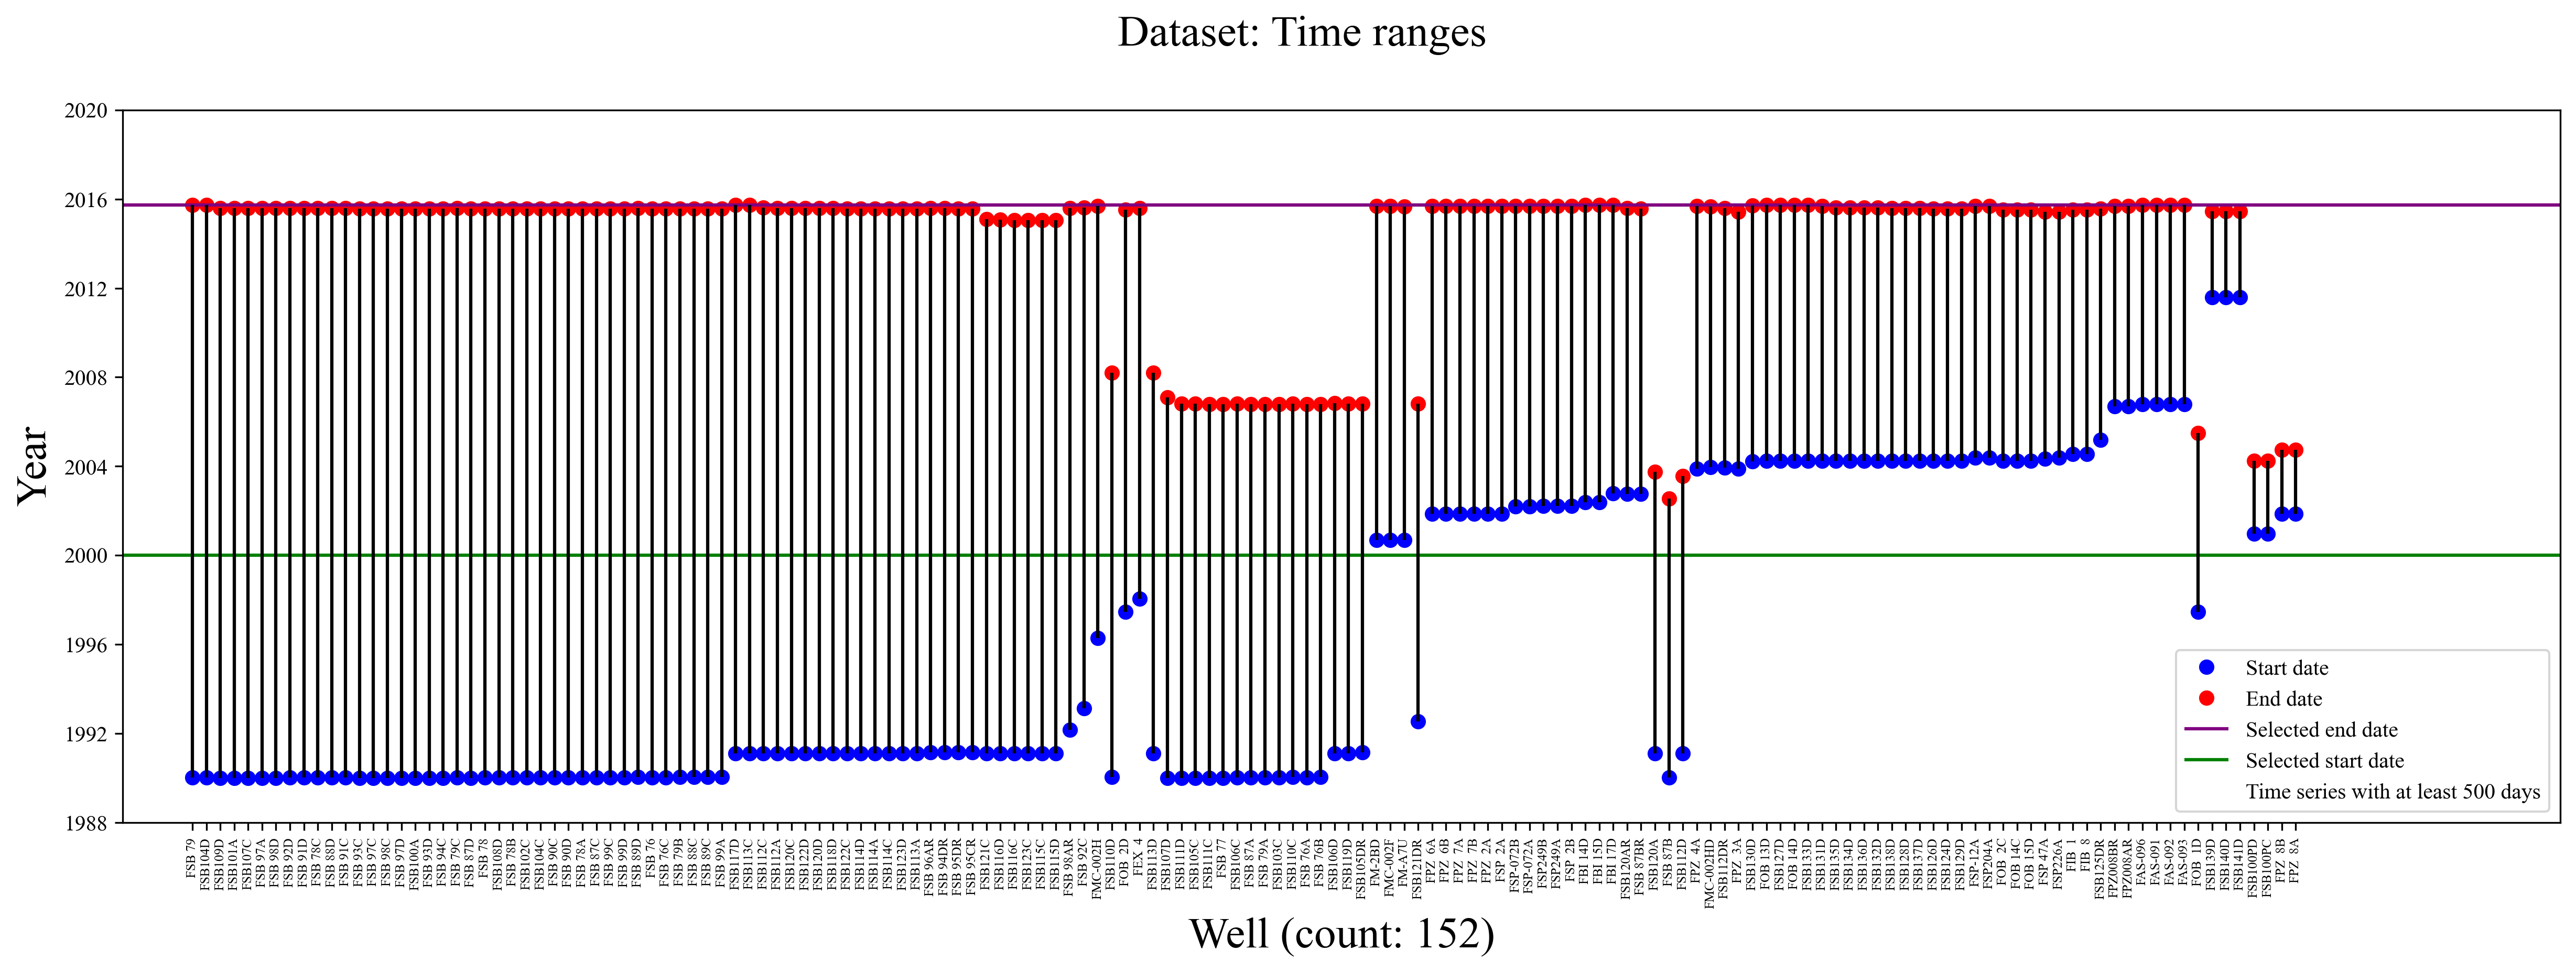

In [22]:
pylenm.plot_all_time_series_simple(start_date='2000-1-1', min_days=500)

STATION_ID START_DATE   END_DATE  RANGE
0      FSB 92D 1990-01-06 2015-08-03   9340
1      FSB 91D 1990-01-06 2015-08-03   9340
2      FSB 78C 1990-01-07 2015-08-03   9339
3      FSB 79C 1990-01-09 2015-08-03   9337
4       FSB 79 1990-01-09 2015-08-03   9337
..         ...        ...        ...    ...
139    FSB139D 2012-06-05 2013-06-18    378
140    FSB140D 2012-06-05 2013-06-18    378
141    FSP  2C 2002-06-25 2002-09-17     84
142    FOB  1D 2004-04-23 2004-06-22     60
143    FOB 14D 2004-06-23 2004-08-19     57

[144 rows x 4 columns]

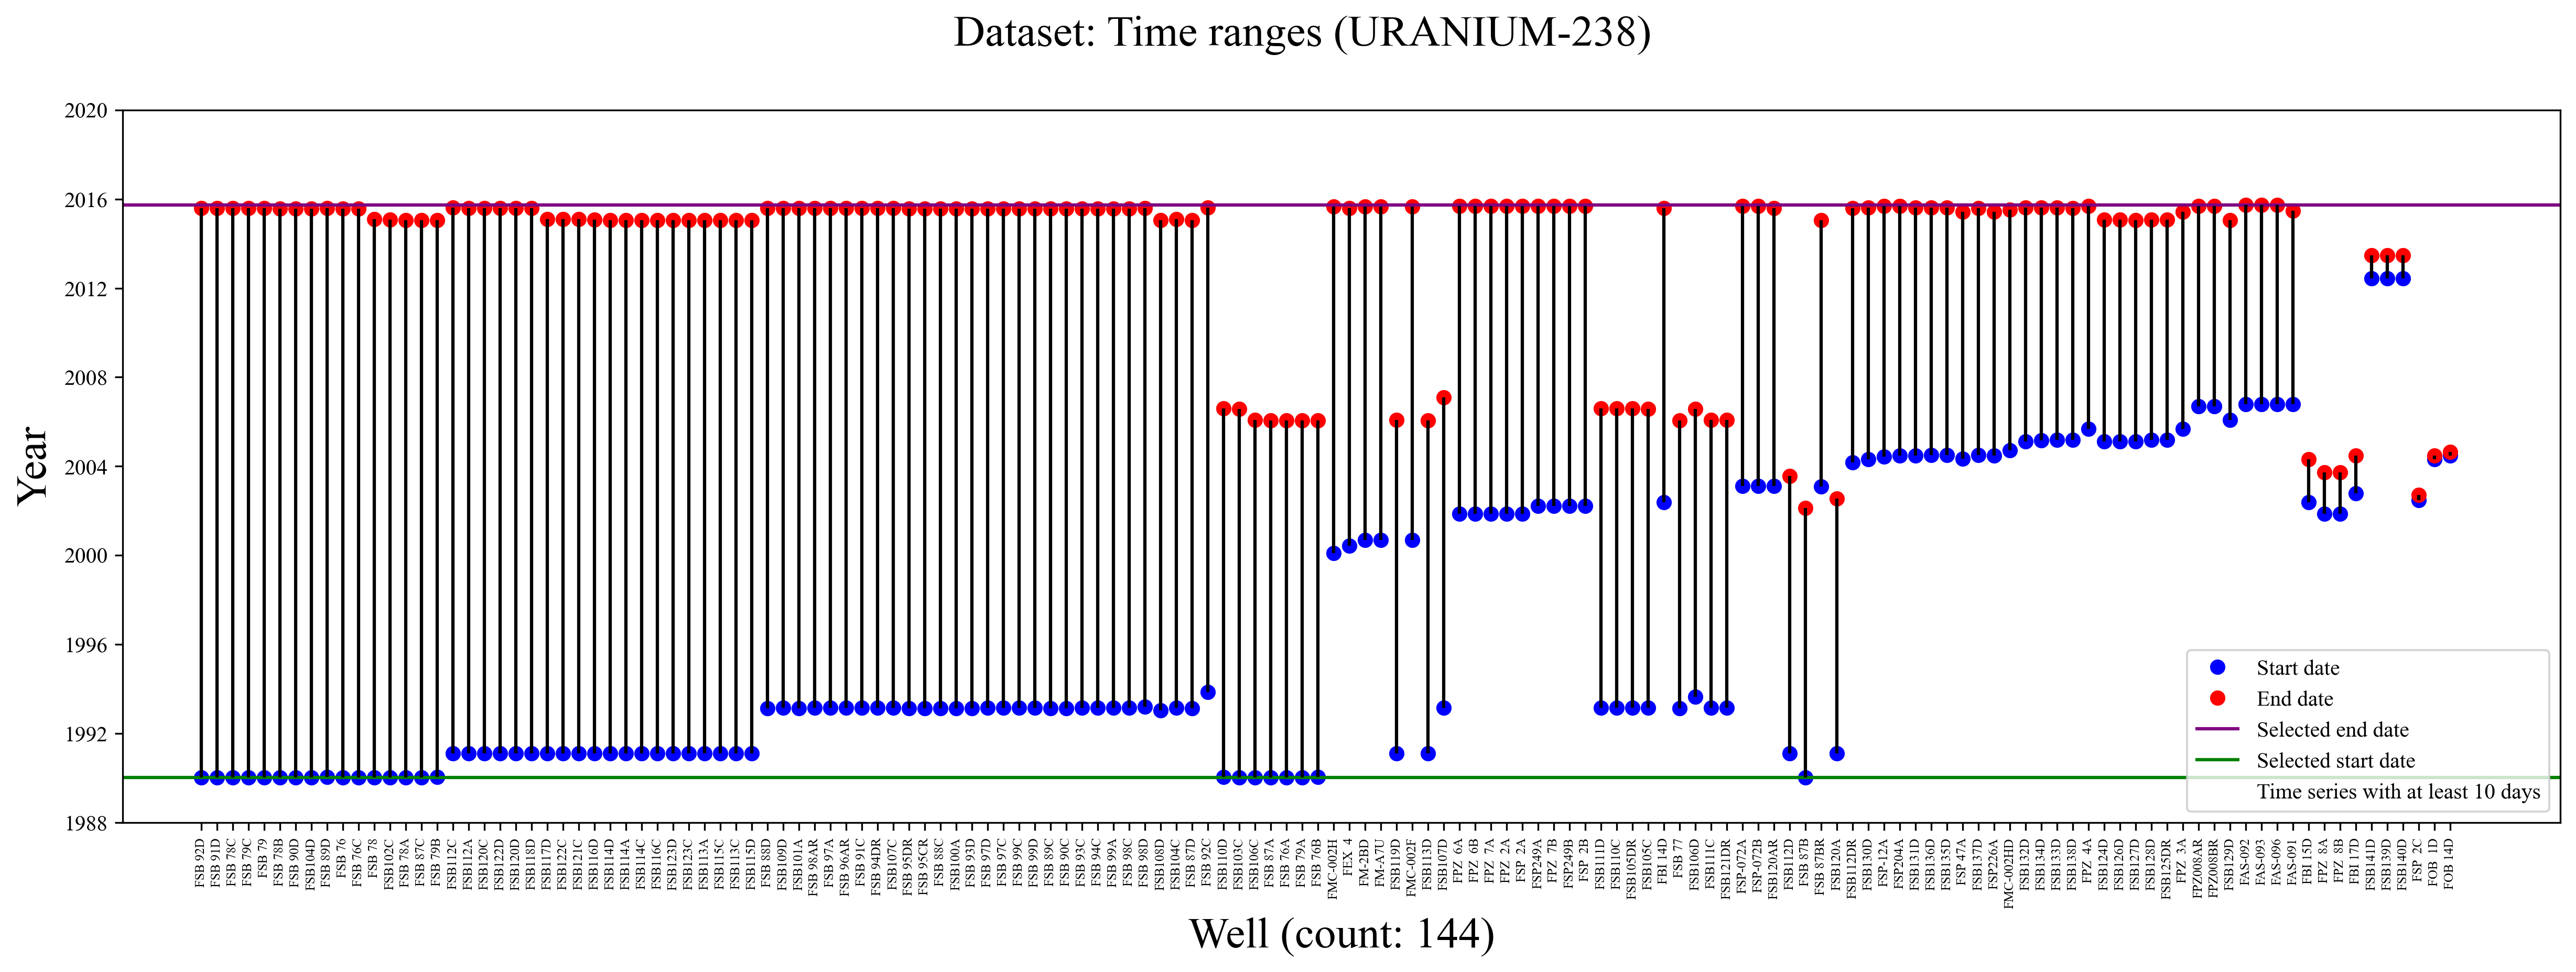

In [23]:
ur = pylenm.plot_all_time_series_simple(analyte_name='URANIUM-238', x_max_lim=150, return_data=True)
ur

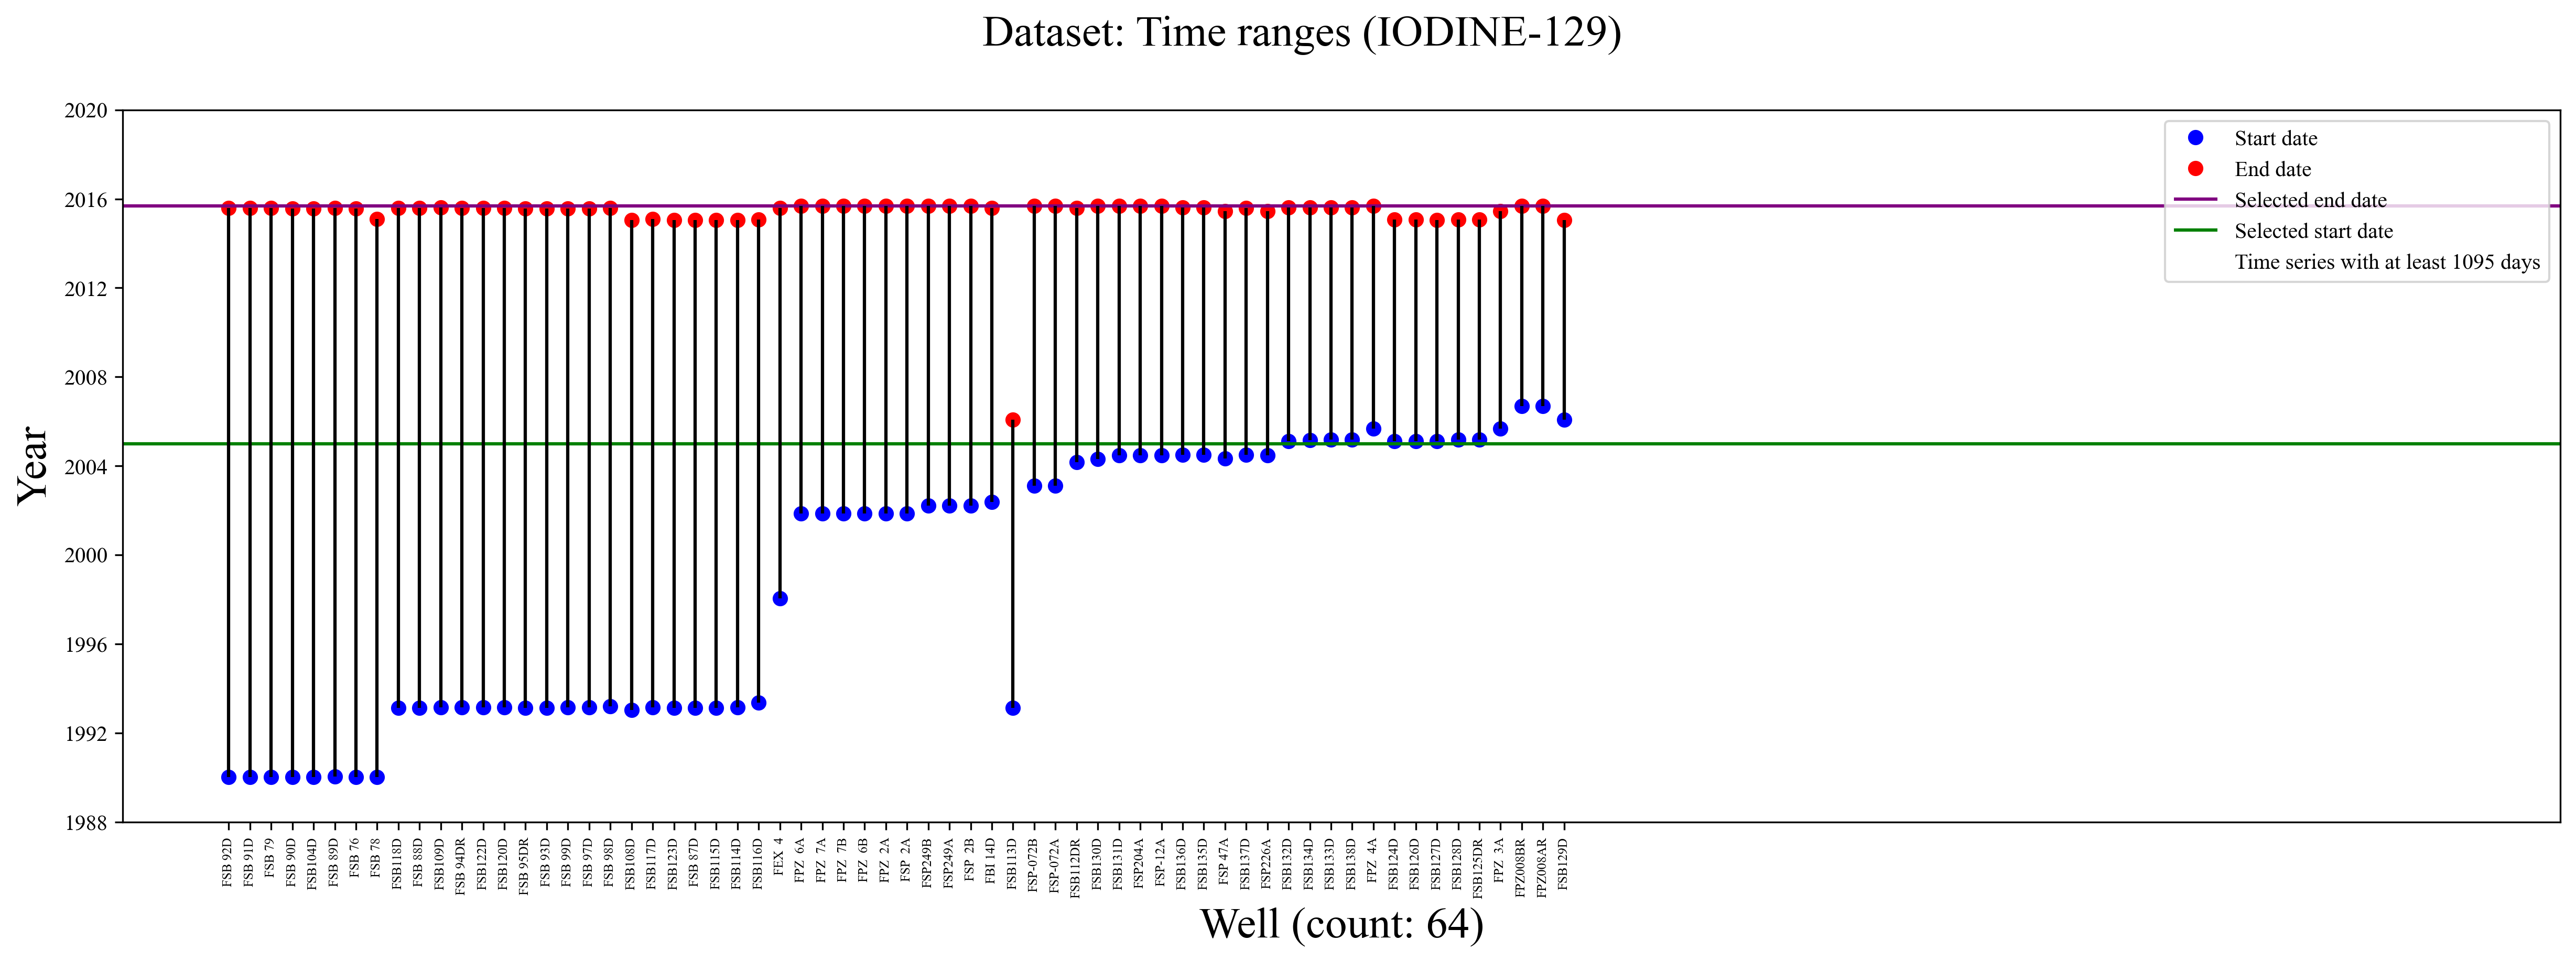

In [24]:
# Added filtering of 'Upper Aquifer' Wells
pylenm.plot_all_time_series_simple(analyte_name='IODINE-129',min_days=3*365, x_max_lim=110, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], start_date='2005-1-1')

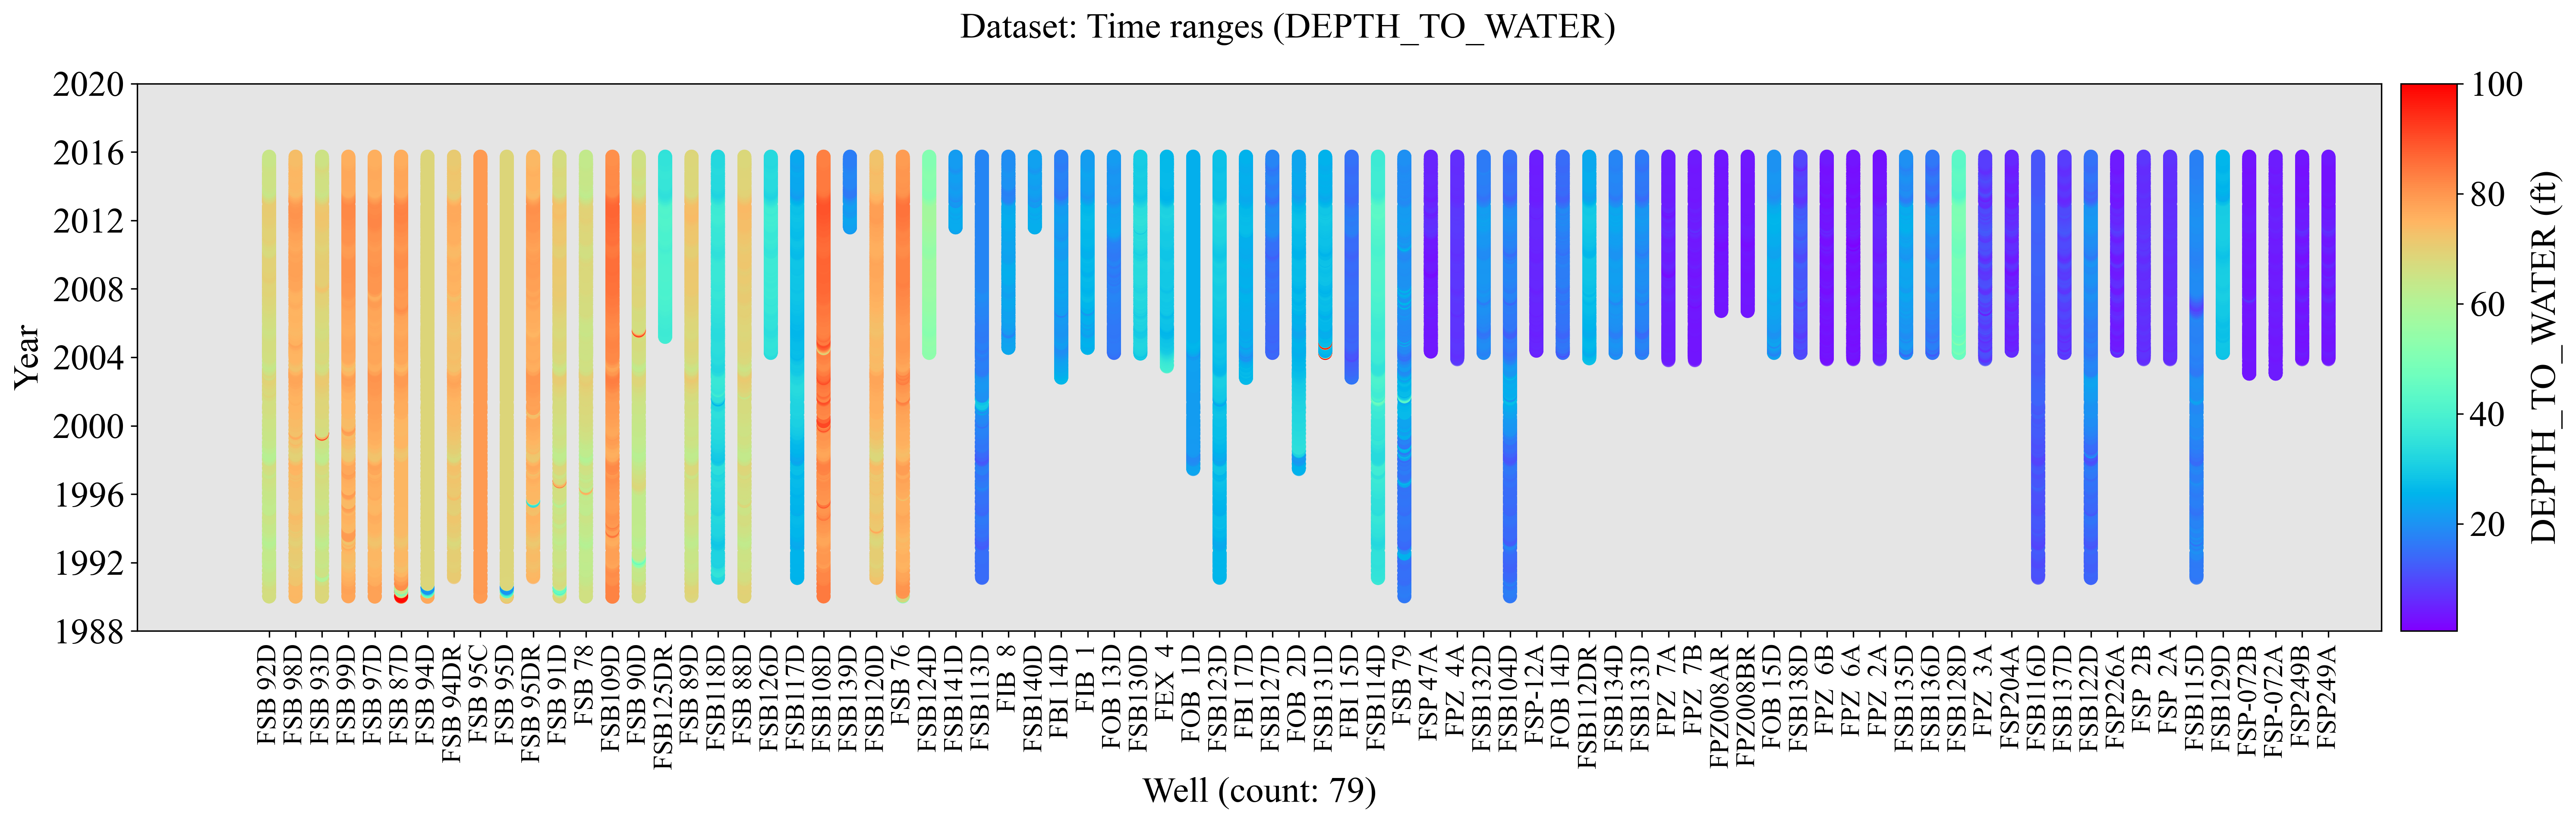

In [25]:
WT_UA = pylenm.plot_all_time_series(analyte_name='DEPTH_TO_WATER', x_max_lim=80, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], 
                                    x_label_size=15, marker_size=60, return_data=True, cbar_max=100, y_2nd_label='DEPTH_TO_WATER (ft)')

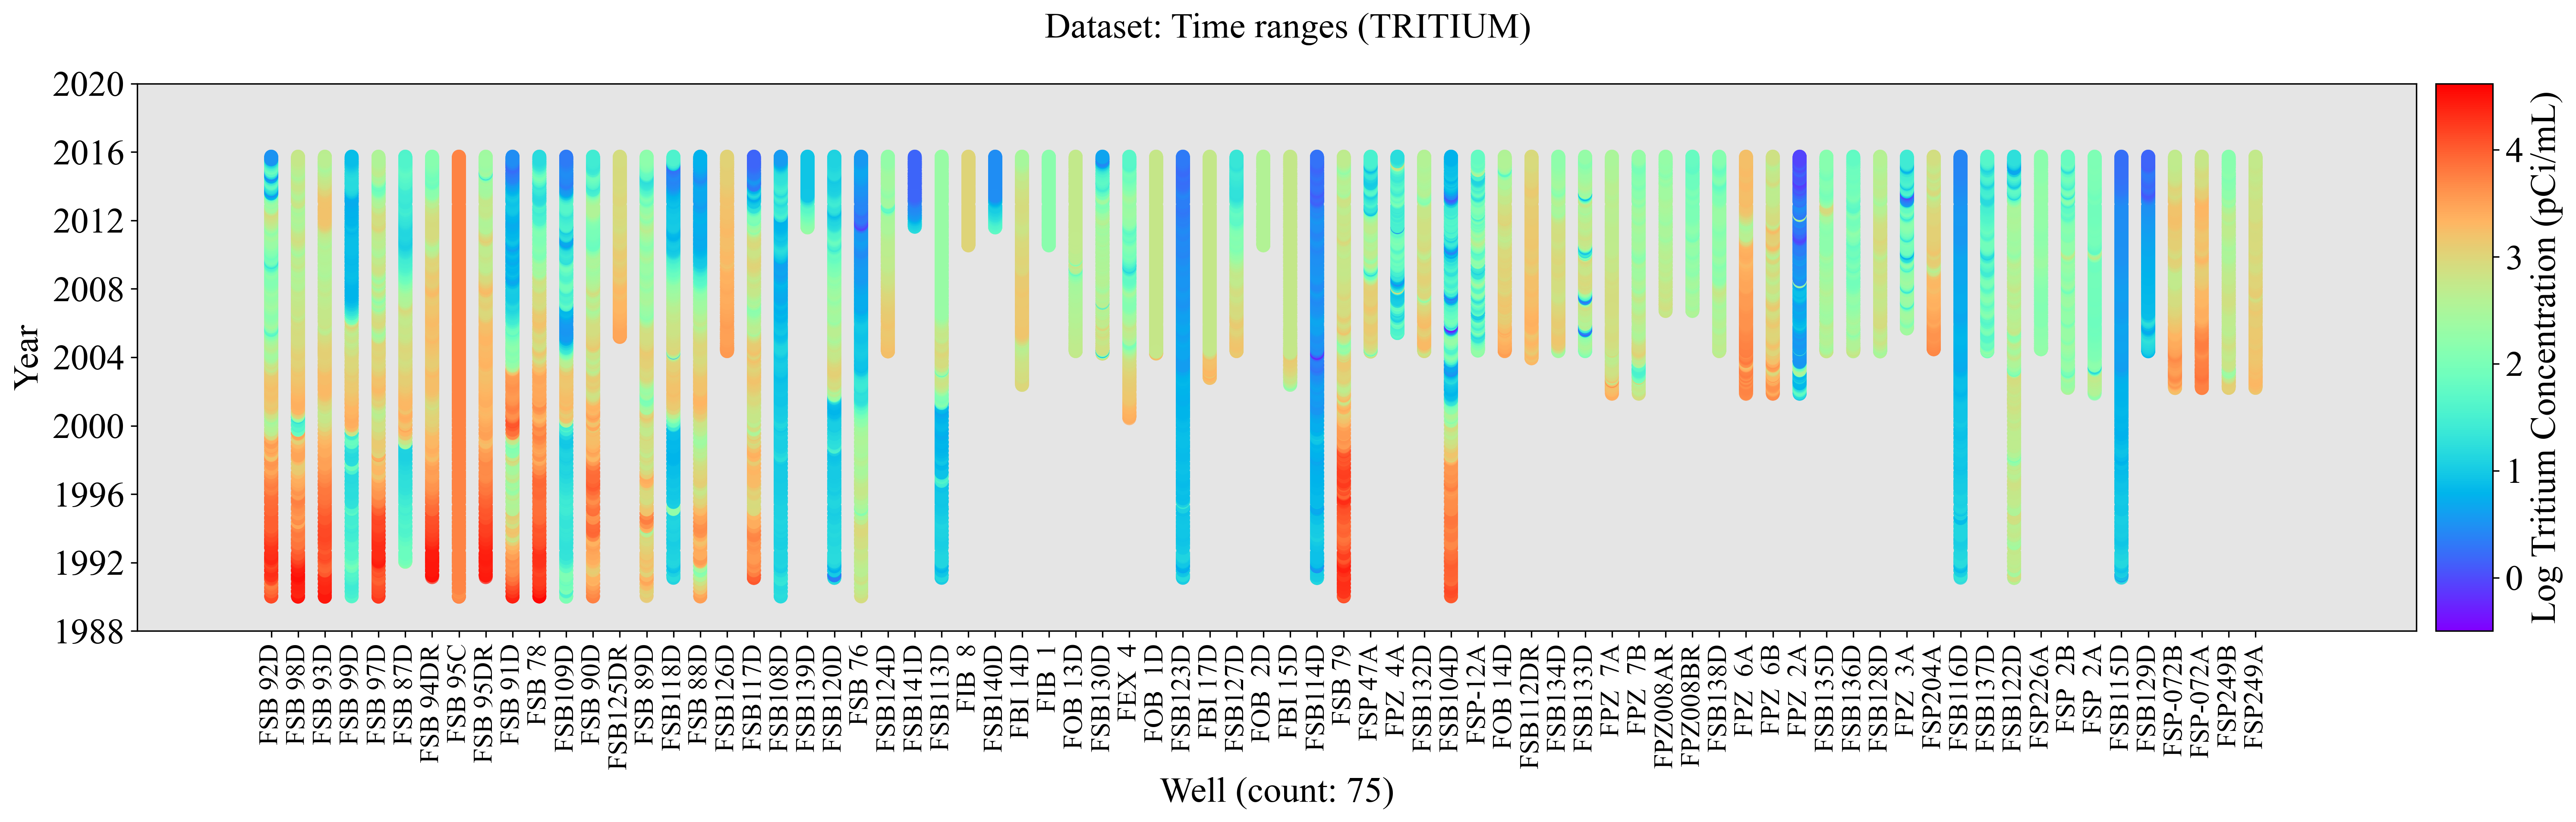

In [26]:
TR_UP = pylenm.plot_all_time_series(analyte_name='TRITIUM', x_max_lim=80, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], 
                                x_label_size=15, marker_size=60, log_transform=True, return_data=True, drop_cols=['FSB131D'],
                                cbar_min=-0.5, y_2nd_label='Log Tritium Concentration (pCi/mL)')

In [27]:
usage.get_FunctionDescription('plot_data')


plot_data (well_name, analyte_name, log_transform=True,
     alpha=0, year_interval=2, plot_inline=True, save_dir='plot_data')
Description:
    Plot concentrations over time of a specified well and analyte with a smoothed curve on interpolated data points.
Parameters:
    well_name (string): name of the well to be processed
    analyte_name (string): name of the analyte to be processed
    log_transform (bool): choose whether or not the data should be transformed to log base 10 values
    alpha (int): value between 0 and 10 for line smoothing
    year_interval (int): plot by how many years to appear in the axis e.g.(1 = every year, 5 = every 5 years, ...)
    plot_inline (bool): choose whether or not to show plot inline
    save_dir (string): name of the directory you want to save the plot to



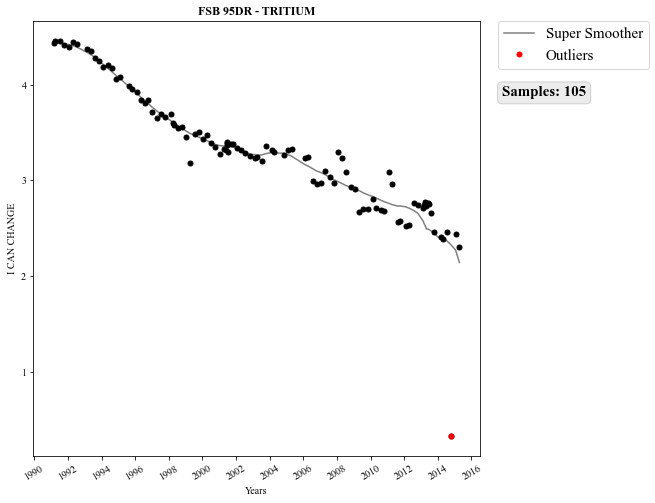

In [28]:
pylenm.plot_data(well_name= 'FSB 95DR', analyte_name='TRITIUM', y_label="I CAN CHANGE")

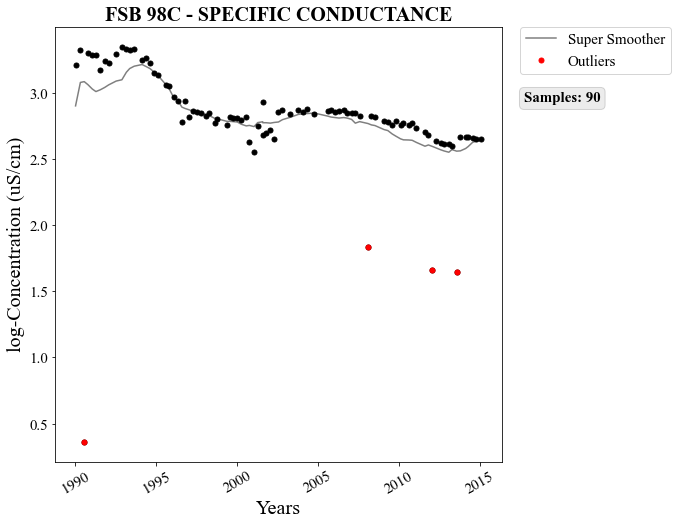

In [29]:
pylenm.plot_data(well_name= 'FSB 98C', analyte_name='SPECIFIC CONDUCTANCE', year_interval=5)

When using the interpolation functionality, a resampling frequency can be specifed. Correct inputs for the the frequency can be found in the function description. 

In [30]:
usage.get_FunctionDescription('interpolate_wells_by_analyte')


interpolate_wells_by_analyte (analyte, frequency='2W', rm_outliers=True, z_threshold=3)
Description: 
    Resamples analyte data based on the frequency specified and interpolates the values in between. 
    NaN values are replaced with the average value per well.
Parameters:
    analyte (string): analyte name for interpolation of all present wells.
    frequency (string): {‘D’, ‘W’, ‘M’, ‘Y’} frequency to interpolate. 
        See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html for valid frequency inputs. 
        (e.g. ‘W’ = every week, ‘D ’= every day, ‘2W’ = every 2 weeks)
    rm_outliers (bool): flag to remove outliers in the data
    z_threshold (int): z_score threshold to eliminate outliers




The `interpolate_wells_by_analyte` function is great as it interpolates and combines all of the wells with the same analyte. There is no need to specify a start and end date as the algorithm will find the optimum start and end date.

In [31]:
wt = pylenm.interpolate_wells_by_analyte(analyte='DEPTH_TO_WATER',
                                         frequency= 'D',
                                         rm_outliers=True,
                                         z_threshold=2.5)
wt

FBI 14D    FSB115D    FSB113A    FSB113C    FSB113D    FSB114A  \
2003-11-18  22.280040  17.512000  65.431169  22.193247  17.418831  97.627037   
2003-11-19  22.268978  17.518000  65.430519  22.189221  17.419481  97.625432   
2003-11-20  22.257916  17.524000  65.429870  22.185195  17.420130  97.623827   
2003-11-21  22.246854  17.530000  65.429221  22.181169  17.420779  97.622222   
2003-11-22  22.235792  17.536000  65.428571  22.177143  17.421429  97.620617   
...               ...        ...        ...        ...        ...        ...   
2015-09-20  17.370588  17.500000  67.000000  23.191207  18.200000  98.100000   
2015-09-21  17.380392  17.500000  67.000000  23.194138  18.200000  98.100000   
2015-09-22  17.390196  17.500000  67.000000  23.197069  18.200000  98.100000   
2015-09-23  21.100414  17.945698  66.153712  22.145371  17.243528  97.637192   
2015-09-24  17.400000  17.500000  67.000000  23.200000  18.200000  98.100000   

              FSB114C    FSB114D    FSB115C    FSB116C    FSB112D    FSB116D  \
2003-11-18  40.203704  36.099259  23.501053  13.566211  28.850000  11.955579   
2003-11-19  40.209877  36.118025  23.498947  13.563789  28.850000  11.954421   
2003-11-20  40.216049  36.136790  23.496842  13.561368  28.850000  11.953263   
2003-11-21  40.222222  36.155556  23.494737  13.558947  28.850000  11.952105   
2003-11-22  40.228395  36.174321  23.492632  13.556526  28.850000  11.950947   
...               ...        ...        ...        ...        ...        ...   
2015-09-20  41.600000  37.400000  23.900000  14.000000  28.850000  11.600000   
2015-09-21  41.600000  37.400000  23.900000  14.000000  28.850000  11.600000   
2015-09-22  41.600000  37.400000  23.900000  14.000000  28.850000  11.600000   
2015-09-23  41.290187  37.941873  23.780778  13.833220  27.406294  12.093852   
2015-09-24  41.600000  37.400000  23.900000  14.000000  28.850000  11.600000   

              FSB117D    FSB118D    FSB119D     FSB120A    FSB120AR  \
2003-11-18  29.016883  32.926753  48.162439  132.700000  132.617778   
2003-11-19  29.001948  32.940779  48.162805  132.700000  132.617407   
2003-11-20  28.987013  32.954805  48.163171  132.700000  132.617037   
2003-11-21  28.972078  32.968831  48.163537  132.700000  132.616667   
2003-11-22  28.957143  32.982857  48.163902  132.700000  132.616296   
...               ...        ...        ...         ...         ...   
2015-09-20  23.429455  32.400000  48.400000  132.700000  133.000000   
2015-09-21  23.439636  32.400000  48.400000  132.700000  133.000000   
2015-09-22  23.449818  32.400000  48.400000  132.700000  133.000000   
2015-09-23  27.192482  33.753056  47.648944  129.522501  133.218287   
2015-09-24  23.460000  32.400000  48.400000  132.700000  133.000000   

              FSB120C   FSB112DR    FSB112C    FSB121C    FSB106D    FSB103C  \
2003-11-18  76.201852  26.669754  31.247073  55.408537  30.550182  42.617143   
2003-11-19  76.204938  26.669754  31.239634  55.407317  30.542774  42.608452   
2003-11-20  76.208025  26.669754  31.232195  55.406098  30.535365  42.599762   
2003-11-21  76.211111  26.669754  31.224756  55.404878  30.527956  42.591071   
2003-11-22  76.214198  26.669754  31.217317  55.403659  30.520547  42.582381   
...               ...        ...        ...        ...        ...        ...   
2015-09-20  75.200000  23.570000  28.420000  54.200000  30.400000  42.050000   
2015-09-21  75.200000  23.570000  28.420000  54.200000  30.400000  42.050000   
2015-09-22  75.200000  23.570000  28.420000  54.200000  30.400000  42.050000   
2015-09-23  76.380019  26.669754  30.038918  55.130096  29.719951  41.949879   
2015-09-24  75.200000  23.570000  28.420000  54.200000  30.400000  42.050000   

              FSB104C    FSB104D    FSB105C    FSB105D   FSB105DR    FSB106C  \
2003-11-18  21.241429  19.777778  80.128049  78.410000  76.600000  35.896296   
2003-11-19  21.231190  19.740741  80.134756  78.410000  76.612500  35.890123   
2003-11-20  21.220952  19.703704  80.1

Let's look at the difference between removing the outliers and keeping them.

<AxesSubplot:>

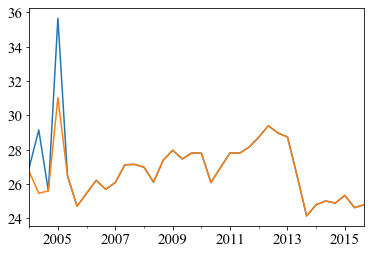

In [32]:
freq = '4M'
analyte = 'DEPTH_TO_WATER'

wt_with_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                       frequency = freq,
                                                       rm_outliers=False)

wt_without_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                          frequency = freq,
                                                          rm_outliers=True,
                                                          z_threshold=1.5)

wt_with_outliers['FSB131D'].plot()
wt_without_outliers['FSB131D'].plot()

<AxesSubplot:>

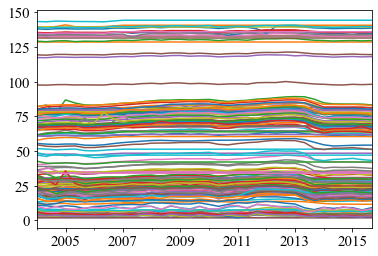

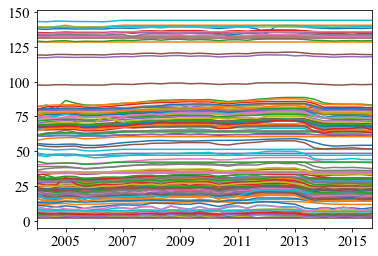

In [33]:
wt_with_outliers.plot(legend=None)
wt_without_outliers.plot(legend=None)

The `interpolate_well_data` function is useful if you are only looking at one well at a time. But has limited functionality as it can only take in **ONE** well as a parameter. 

In [34]:
pylenm.interpolate_well_data(well_name='FSB 95DR',
                             analytes=['DEPTH_TO_WATER', 'URANIUM-238'],
                             frequency='2M')

DEPTH_TO_WATER  URANIUM-238
COLLECTION_DATE                             
1993-02-28               73.030  1620.000000
1993-04-30               72.120  1475.000000
1993-06-30               71.325  1330.000000
1993-08-31               71.940  1100.000000
1993-10-31               72.540  1155.000000
...                         ...          ...
2014-12-31               75.375   239.666667
2015-02-28               75.610   232.000000
2015-04-30               75.000   224.333333
2015-06-30               74.615   216.666667
2015-08-31               74.230   209.000000

[136 rows x 2 columns]